<a href="https://colab.research.google.com/github/leomoritz/python-pandas/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para implementar um classificador SVM em Python, é necessária a instalação das bibliotecas pandas, numpy, matplotlib e scikit-learn. Começaremos com a importação das bibliotecas, e para isso, devemos fazer o seguinte:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Em seguida, importaremos o dataset que será explorado em nossos estudos: o dataset Íris, considerado clássico no âmbito do Aprendizado de Máquina, classifica tipos de flores da espécie Íris a partir de características como comprimento de pétala, largura da pétala, comprimento da sépala e largura da sépala (todas em cm). Para isso, o adicionaremos ao nosso código, observando o destaque da coluna de classe (target) das características.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data.feature_names)
target = data.target

Para a instanciação simples do classificador, podemos adicionar o seguinte bloco de código, observando que o classificador SVM é identificado no scikit-learn a partir do nome SVC (C de Classifier):

In [3]:
#Importando o algoritmo de SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(gamma='auto')

Para treinarmos o modelo e conhecermos a sua performance, adicionaremos o bloco de código a seguir. A validação cruzada é um dos modos mais comuns de se treinar nossos modelos, pois ela divide o conjunto de dados em (k-1)/k partições de treinamento e 1/k de teste de maneira circular e interativa, tendo assim todas as 1/k possíveis partições, podendo ser testadas contra o resto.

In [4]:
#Testando o modelo 'svc' na nossa base 'iris'
cv_result = cross_val_score(svc, iris, target, cv=10, scoring='accuracy')
#Retorna a acurácia em porcentagem do nosso modelo
print('Acurácia com cross validation', cv_result.mean()*100)

Acurácia com cross validation 98.00000000000001


Agora que fizemos o experimento de construir o classificador com os parâmetros padrões da biblioteca, podemos fazer predições. Para tal, vamos treinar nosso modelo com o dataset inteiro e tentar predizer um valor inédito.

In [6]:
svc.fit(iris, target)
#Prediz a que classe pertencerá a flor com sépala de comprimento 6.9 cm e de largura 2.8 cm, e com pétala de comprimento 6.1 cm e de largura 2.3 cm
svc.predict([[6.9, 2.8, 6.1, 2.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

Feito isso, vamos visualizar nossos dados e os hiperplanos definidos pelo modelo. Nossos dados têm o seguinte comportamento:

Text(0.5, 1.0, 'Iris')

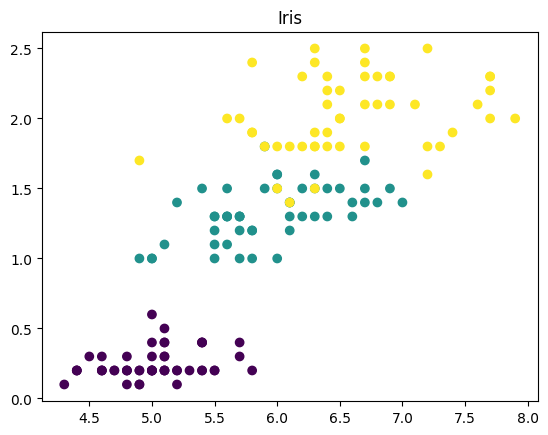

In [7]:
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target)
plt.title('Iris')

Como podemos ver no gráfico, nosso problema parece ser linearmente separável, o que pode ser feito com este outro bloco de código:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


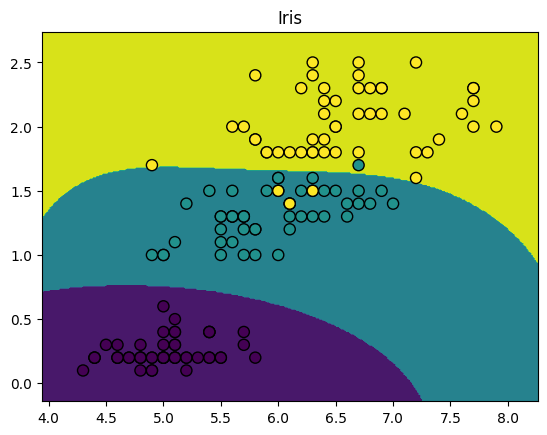

In [8]:
#Provavelmente, criando 2 features novas no íris, o svm com 2 features terá mais sucesso, mas por enquanto usei só
 #sepal length e petal width (os mais relevantes das 4 features já existentes)
x0_min, x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min, x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300),
                          np.linspace(x1_min-.1*h, x1_max+.1*h, 300))
svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)
plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()

# Demonstração de classificação com árvore de decisão usando Scikit-Learn

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

Agora, vamos ao processo de experimentação por meio do treinamento feito com validação cruzada. Basta adicionarmos este bloco de código:

In [10]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

Com os dados carregados e o experimento executado para checarmos a possível média de acurácia do modelo treinado com o conjunto, vamos ao treinamento propriamente dito e à visualização do resultado.

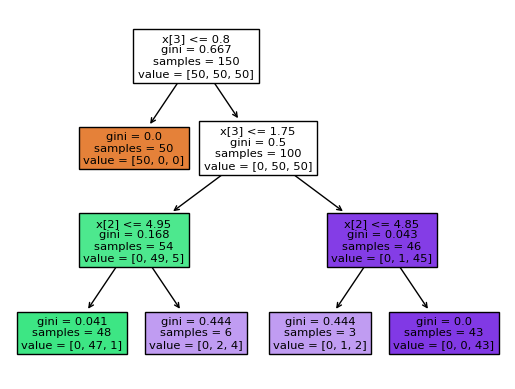

In [11]:
clf.fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()